# About the Dataset

Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

# PROBLEM STATEMENT


Customer churn is a critical issue for businesses, affecting revenue and long-term
growth. Understanding the factors that influence customer churn can help
companies implement targeted retention strategies. This study aims to analyze
customer demographics, usage patterns, payment behavior, and subscription
details to develop a predictive model for identifying customers at risk of
churning. The goal is to reduce churn rates and improve customer satisfaction
through data-driven insights .

# Target Variable

churn


# Description of the Data

CustomerID : A unique identifier assigned to each customer .

Age : Represents the customer&#39;s age in years .

Gender : Specifies whether the customer is male or female .

Tenure : Indicates the number of months a customer has been subscribed to the
service .

Usage Frequency : Refers to how often a customer uses the service .

Support Calls : Represents the number of times a customer has contacted
customer support .

Payment Delay : Shows the number of days a customer has delayed their
payments .

Subscription Type : Categorizes customers based on their subscription plans,
such as Basic, Standard, or Premium .

Contract Length : Indicates the duration of the customer’s contract, such as
Monthly, Quarterly, or Annual .

Total Spend : Represents the total amount of money a customer has spent
during their tenure .

Last Interaction : Refers to the number of days since the customer last
engaged with the service .



# Understand the data

Understand about the data

In [63]:

# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats


In [64]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [65]:

# Load the data

df = pd.read_csv('/content/customer_churn.csv')
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [66]:

# Informantion of the data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


*  In this data there were 440833 rows and 12 columns
*  There were all the columns have null values
*  Objectives of the data contain 9 int and 3 object

In [67]:
# column name of the data
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [68]:

# Description of the data

df.describe()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


*  In this data some of the columns have skewness

In [69]:

# checking null values

df.isnull().sum()


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [70]:

# Handle missing values

df['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
df['Usage Frequency'].fillna(df['Usage Frequency'].mode()[0], inplace=True)
df['Support Calls'].fillna(df['Support Calls'].mean(), inplace=True)
df['Payment Delay'].fillna(df['Payment Delay'].mean(), inplace=True)
df['Subscription Type'].fillna(df['Subscription Type'].mode()[0], inplace=True)
df['Contract Length'].fillna(df['Contract Length'].mode()[0], inplace=True)
df['Total Spend'].fillna(df['Total Spend'].mean(), inplace=True)
df['Last Interaction'].fillna(df['Last Interaction'].mean(), inplace=True)
df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)


<ipython-input-70-65a1bdc70b1e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)
<ipython-input-70-65a1bdc70b1e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

*  In this data all the columns have null values

In [71]:

# checking all the null values have been filled

df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [72]:

# checking duplicates values

df.duplicated().sum()


np.int64(0)

*  There were no duplicates values also

In [73]:

# ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = OrdinalEncoder()

# Apply the encoder
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Display the encoded DataFrame
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0.0,39.0,14.0,5.0,18.0,2.0,0.0,932.0,17.0,1.0
1,3.0,65.0,0.0,49.0,1.0,10.0,8.0,0.0,1.0,557.0,6.0,1.0
2,4.0,55.0,0.0,14.0,4.0,6.0,18.0,0.0,2.0,185.0,3.0,1.0
3,5.0,58.0,1.0,38.0,21.0,7.0,7.0,2.0,1.0,396.0,29.0,1.0
4,6.0,23.0,1.0,32.0,20.0,5.0,8.0,0.0,1.0,617.0,20.0,1.0


*  Here we have encoding ordinal encoder because the object column have an order so we use ordinal enconding

# Data Visualization
Create histograms for all numerical columns to understand the distributia.

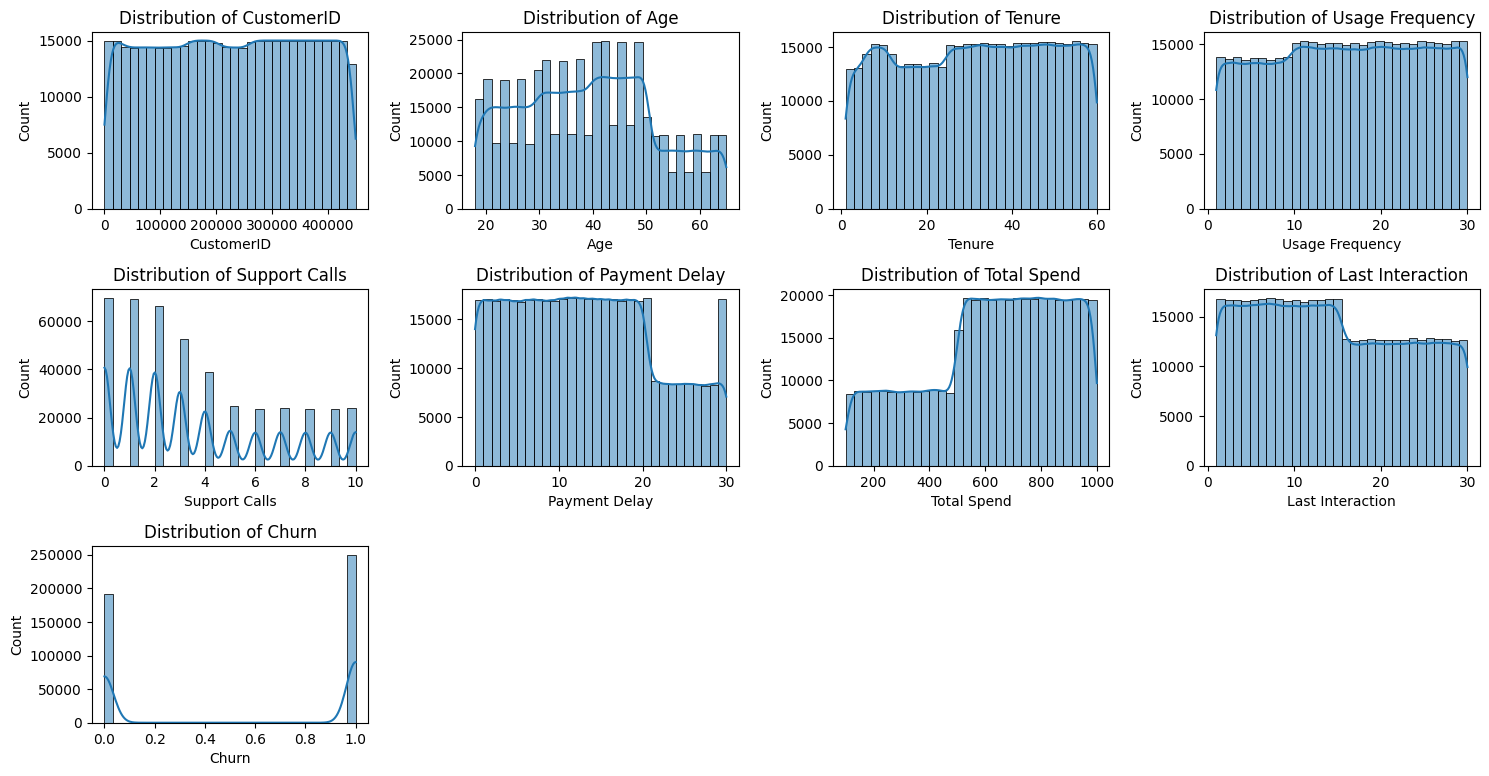

In [74]:

# Visualize Feature Distributions.
# Histograms for numerical features.

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


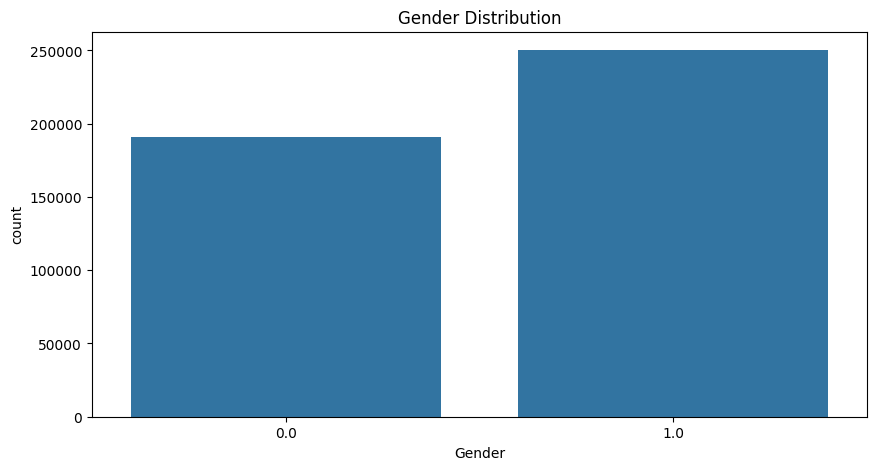

In [75]:

# Plot of Gender Distribution

plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


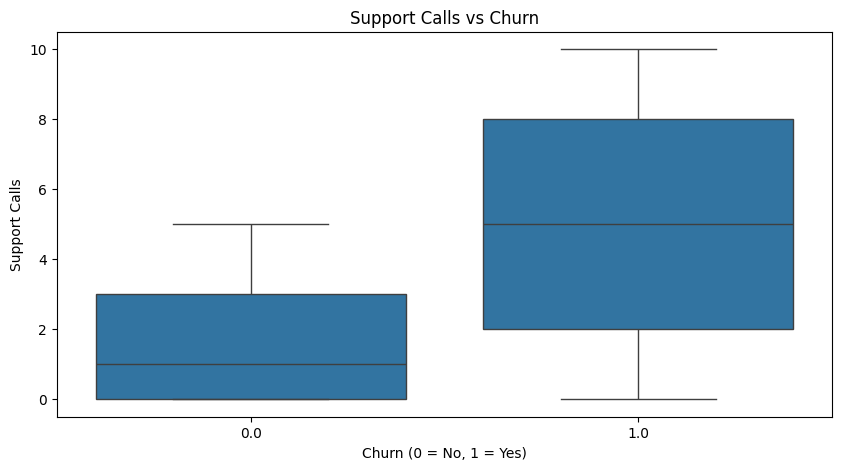

In [76]:

# Plot of Support Calls vs Churn

plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()


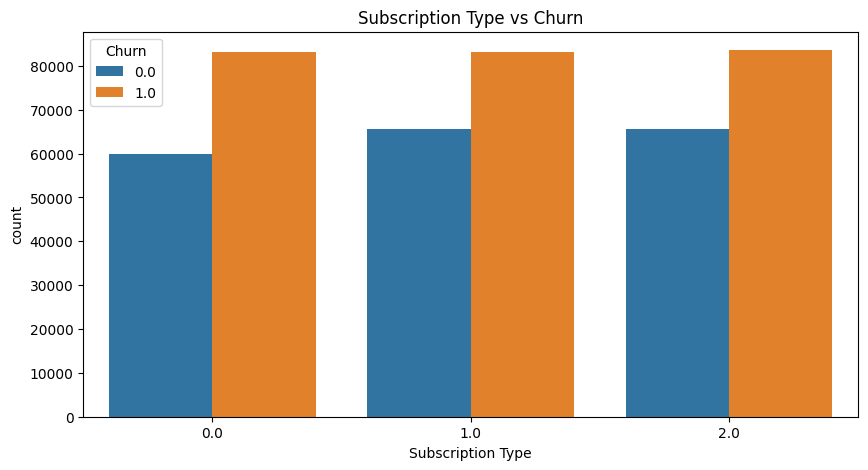

In [77]:

# Plot of Subscription Type vs Churn

plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn')
plt.show()


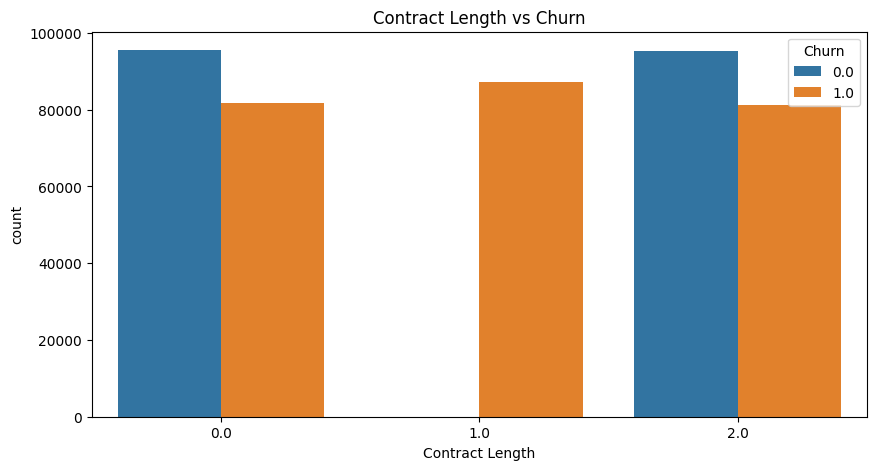

In [78]:

# Plot of Contract Length vs Churn

plt.figure(figsize=(10, 5))
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title('Contract Length vs Churn')
plt.show()


# Correlation Analysis
A heatmap was generated to understand the correlation between different features:

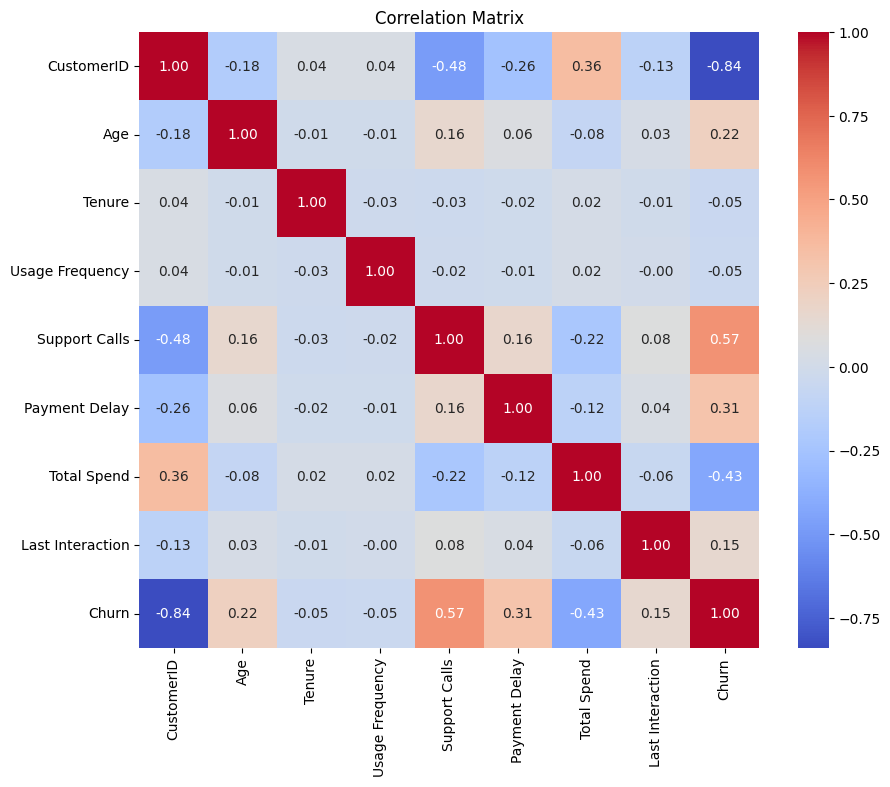

In [79]:

# Correlation Matrix.
# Correlation matrix for numerical features

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


*  Here we haveno complicated corelation

## Outlier Detection

,0
CustomerID,"Axes(0.125,0.653529;0.168478x0.226471)"
Age,"Axes(0.327174,0.653529;0.168478x0.226471)"
Gender,"Axes(0.529348,0.653529;0.168478x0.226471)"
Tenure,"Axes(0.731522,0.653529;0.168478x0.226471)"
Usage Frequency,"Axes(0.125,0.381765;0.168478x0.226471)"
Support Calls,"Axes(0.327174,0.381765;0.168478x0.226471)"
Payment Delay,"Axes(0.529348,0.381765;0.168478x0.226471)"
Subscription Type,"Axes(0.731522,0.381765;0.168478x0.226471)"
Contract Length,"Axes(0.125,0.11;0.168478x0.226471)"
Total Spend,"Axes(0.327174,0.11;0.168478x0.226471)"


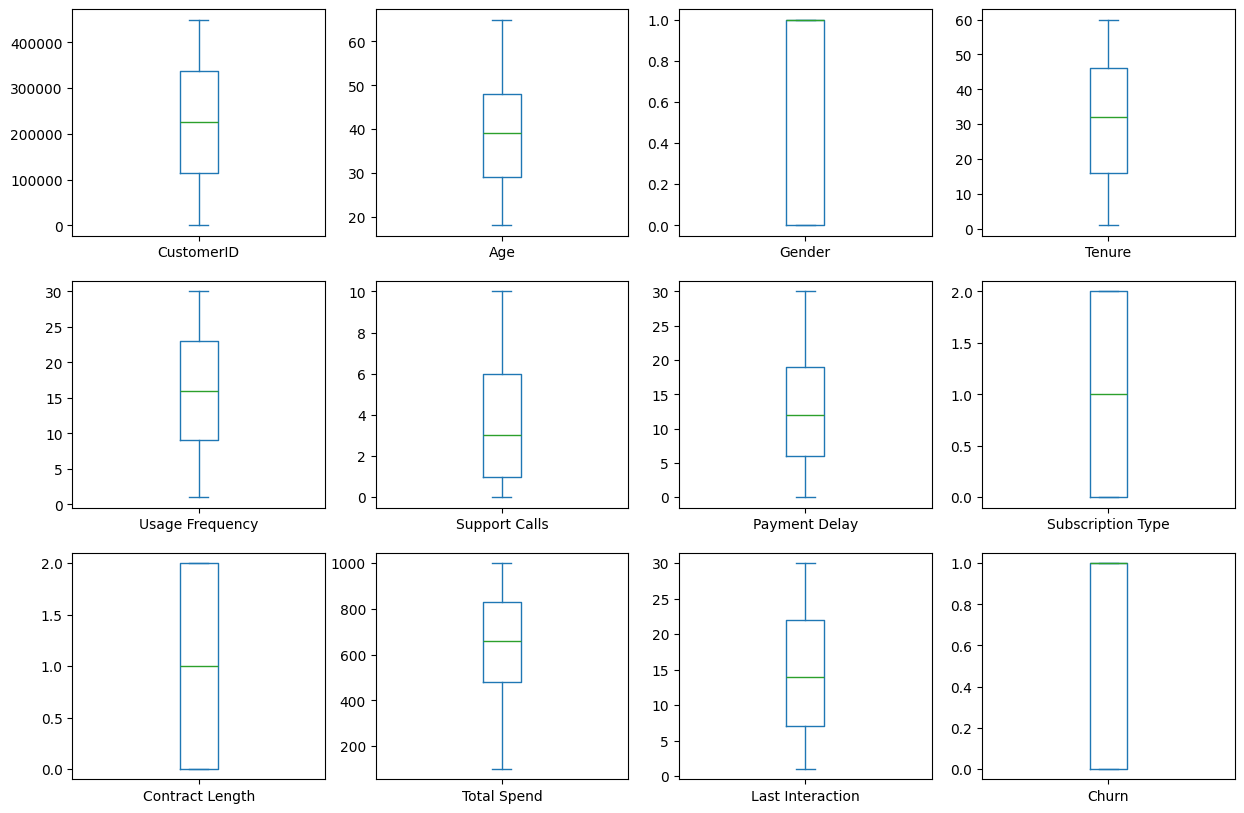

In [80]:

# Outlier

df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 10))


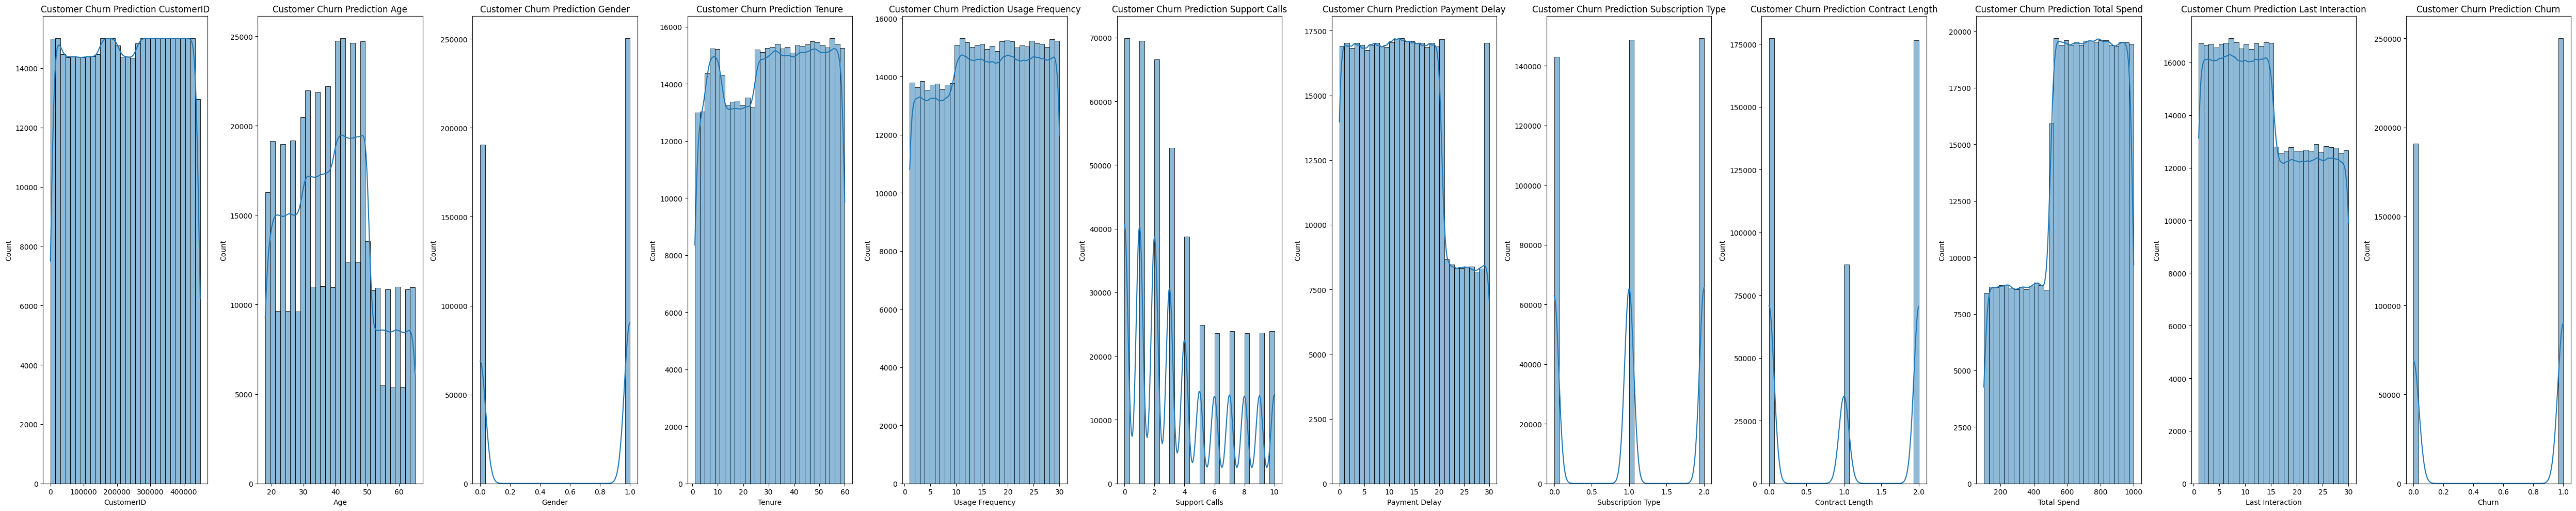

In [81]:

# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]      # Number of features
plt.figure(figsize = (50, 10))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f"Customer Churn Prediction {column}")

plt.tight_layout()

plt.show()


In [82]:

for col in ['CustomerID', 'Age', 'Tenure', 'Support Calls', 'Payment Delay', 'Total Spend']:
    df[col] = np.log1p(df[col])


In [83]:

# Feature Scaling.
# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [84]:

# Split the Data.
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convert the target variable to binary (0 or 1) using a threshold.
# For example, if 'Churn' represents a probability, you might use a threshold of 0.5:
y = (y > 0.5).astype(int)  # Assuming values above 0.5 indicate churn

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#  Algorithms

*** Random Forest Classifier ***

In [85]:

# Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38167
           1       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Confusion Matrix:
[[38140    27]
 [    8 49992]]
Accuracy: 0.9996030260755158


*** KNN ***

In [86]:

# KNN

from sklearn.neighbors import KNeighborsClassifier

# Train
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy: 97.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38167
           1       1.00      0.97      0.98     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



*** SVM ***

In [87]:

from sklearn.svm import SVC

# Train
model2 = SVC()
model2.fit(X_train, y_train)

# Predict and evaluate
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("Accuracy:", accuracy_score(y_test, y_pred2))


0.9922987058650062
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38167
           1       0.99      0.99      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Confusion Matrix:
[[37775   392]
 [  287 49713]]
Accuracy: 0.9922987058650062
